In [12]:
import pandas as pd
import numpy as np
import time
import zipfile
import io
import requests
from matplotlib import pyplot as plt

Tweets (comptes agafats)

In [13]:
url = 'https://raw.githubusercontent.com/AlbertRoca29/EconomiaCircular/main/Tweets.csv'

T = pd.read_csv(url)

Tweets (tots)

In [14]:
url = 'https://github.com/AlbertRoca29/EconomiaCircular/blob/main/Tweets_All.zip?raw=true'

response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
csv_file = zip_file.open('Tweets_All.csv')

T_All = pd.read_csv(csv_file)

<ipython-input-14-587c29d93dd2>:7: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  T_All = pd.read_csv(csv_file)


Anàlisi 

In [30]:
T['Date'] = pd.to_datetime(T['Date'])
print(T['Date'])

0     2023-03-02 23:02:07+00:00
1     2023-03-02 12:15:57+00:00
2     2023-02-04 21:21:00+00:00
3     2023-02-04 16:40:00+00:00
4     2022-12-28 14:00:30+00:00
                 ...           
813   2016-05-13 11:00:38+00:00
814   2016-05-11 09:45:12+00:00
815   2016-05-06 08:30:11+00:00
816   2015-11-20 12:15:28+00:00
817   2013-09-24 15:13:27+00:00
Name: Date, Length: 818, dtype: datetime64[ns, UTC]


<Axes: >

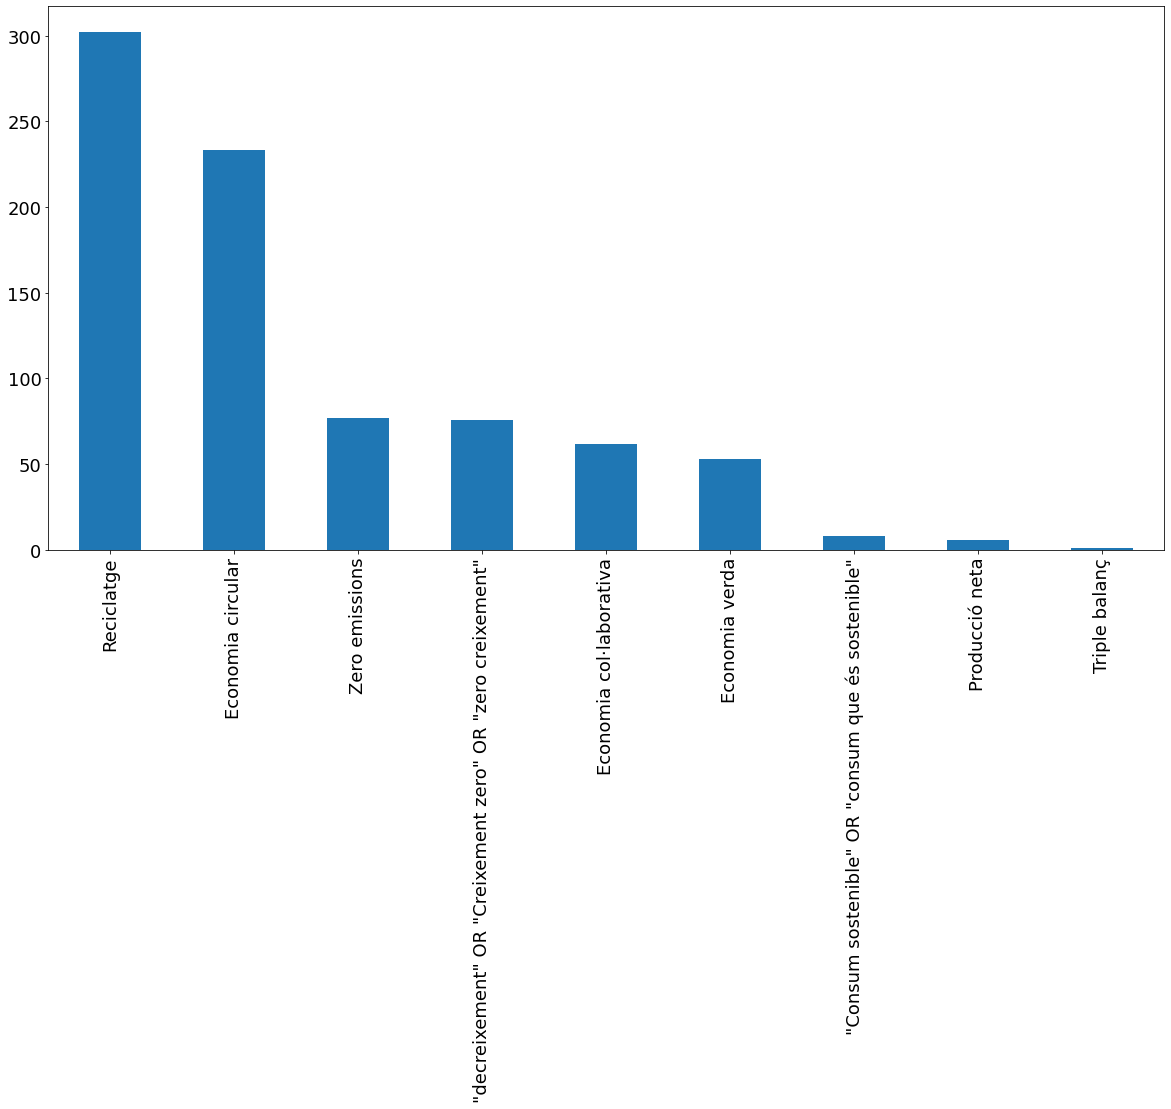

In [25]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
T['Paraula'].value_counts().plot(kind='bar')

<Axes: >

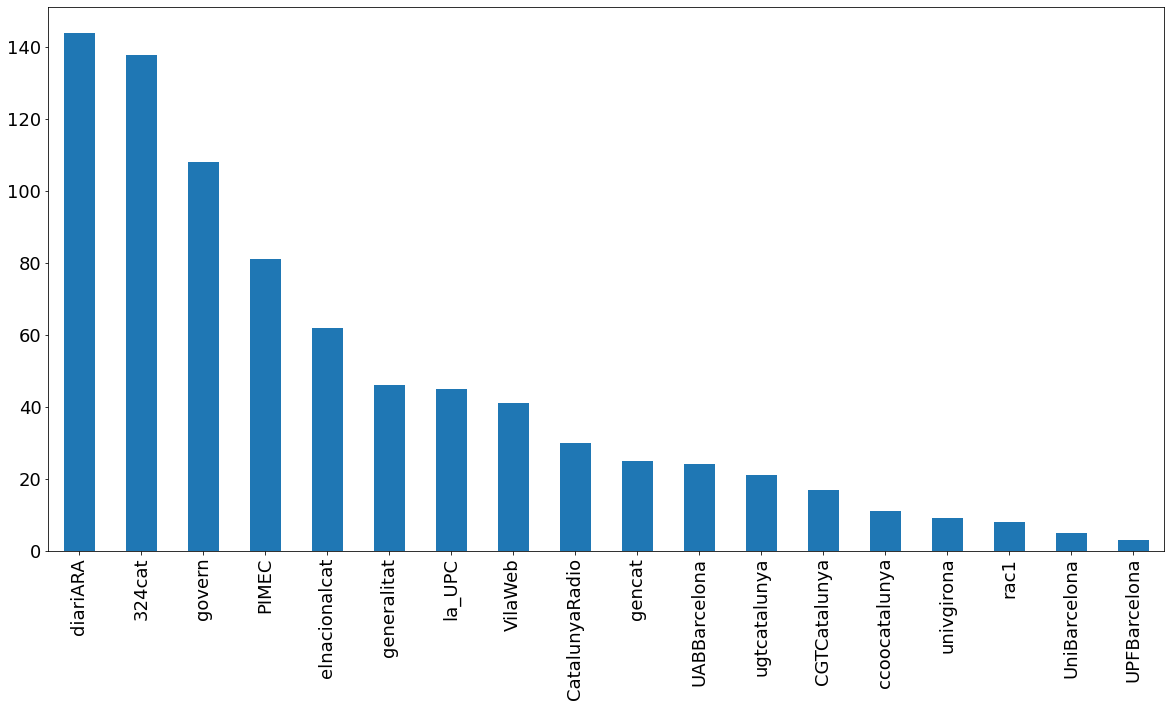

In [46]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
T['User'].value_counts().plot(kind='bar')

([<matplotlib.axis.XTick at 0x7fed1df00dc0>,
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022'),
  Text(15, 0, '2023')])

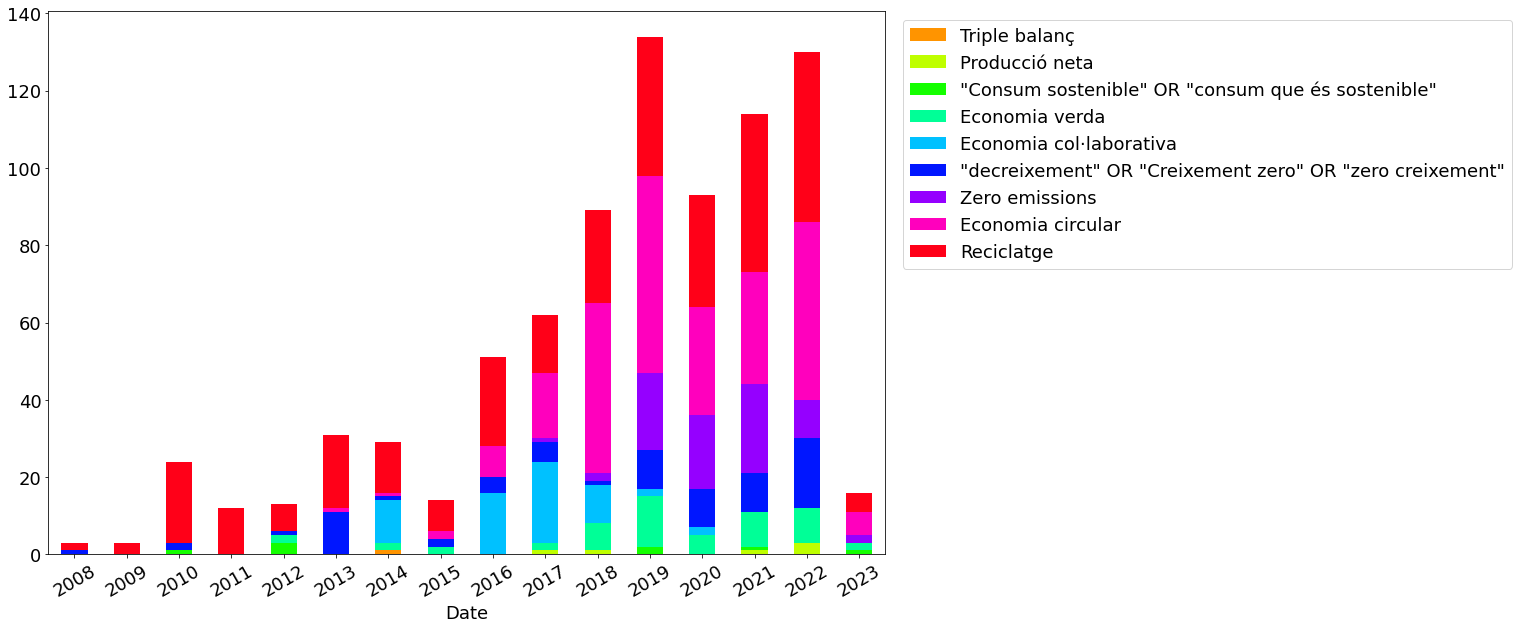

In [52]:
plt.figure(figsize=(15,10))
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Paraula']))))
i=0
bot = 0
year =   T[T['Paraula']=='Reciclatge'].groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()
year-=year

for paraula in list(T['Paraula'].value_counts().sort_values().keys()):
    T_p = T[T['Paraula']==paraula]
    year = (year + T_p.groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()).fillna(0)
    year.plot(kind='bar',color=colors[i],label=paraula,bottom=bot)
    bot += year
    plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
    i+=1
    year-=year

plt.xticks(np.arange(16), np.arange(2008,2024),rotation=30)

In [53]:
list(T['Paraula'].value_counts().sort_values().keys())

['Triple balanç',
 'Producció neta',
 '"Consum sostenible" OR "consum que és sostenible"',
 'Economia verda',
 'Economia col·laborativa',
 '"decreixement" OR "Creixement zero" OR "zero creixement"',
 'Zero emissions',
 'Economia circular',
 'Reciclatge']